In [10]:
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use("ggplot")

In [11]:
import mplfinance as mpf

In [12]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [6]:
df = web.DataReader('TSLA','yahoo',start,end)

In [9]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999


In [10]:
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002


In [13]:
df.to_csv('tsla.csv')

NameError: name 'df' is not defined

In [14]:
df = pd.read_csv('data/tesla.csv',parse_dates=True,index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


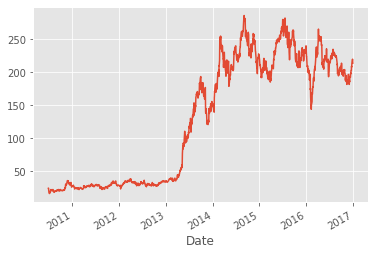

In [15]:
df['Adj Close'].plot()
plt.show()

In [16]:
df['100ma'] = df ['Adj Close'].rolling(window=100,min_periods=0).mean()
# we will take the mean from 100 but the minimum is equal 0 

In [17]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


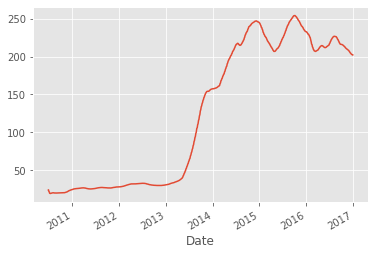

In [18]:
df['100ma'].plot()
plt.show()

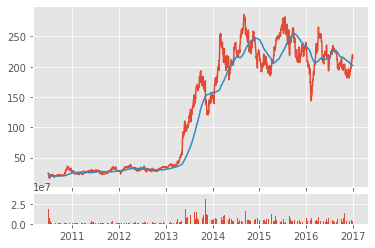

In [19]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

In [20]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [21]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [22]:
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

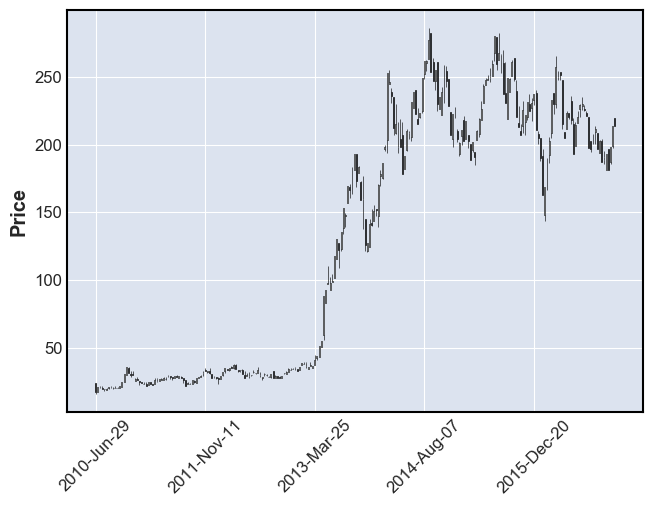

In [24]:
mpf.plot(df_ohlc,type='candle')